In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names =  ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names = names)

In [5]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 6  0  0]
 [ 0  9  0]
 [ 0  2 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.87      0.93        15

      micro avg       0.93      0.93      0.93        30
      macro avg       0.94      0.96      0.94        30
   weighted avg       0.95      0.93      0.93        30



In [ ]:
### COMPARING ERROR RATE WITH THE K VALUE ###

Text(0, 0.5, 'Mean Error')

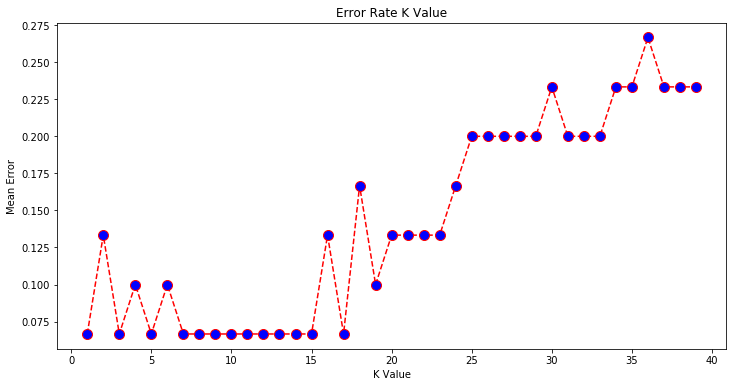

In [21]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    error.append(np.mean(predict_i != y_test))

# The next step is to plot the error values against K values. Excuse the following script to create the plot
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle = 'dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')